# Sweep Signals and their Spectra

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the masters module Selected Topics in Audio Signal Processing, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## The Linear Sweep

A [linear sweep](https://en.wikipedia.org/wiki/Chirp#Linear) is an exponential signal with linear increase in its instantaneous frequency. It is defined as

\begin{equation}
x(t) = e^{j \omega(t) t}
\end{equation}

with 

\begin{equation}
\omega(t) = \omega_\text{l} - \frac{\omega_\text{u} - \omega_\text{l}}{2 T} t
\end{equation}

where $\omega_\text{l}$ and $\omega_\text{u}$ denote its lower and upper frequency limit, and $T$ its total duration. The linear sweep is generated in the following by sampling the continuous time.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf

fs = 48000  # sampling frequency
om_l = 2*np.pi*200  # lower angluar frequency of sweep
om_u = 2*np.pi*18000  # upper angular frequency of sweep
T = 5  # duration of sweep
k = (om_u - om_l)/(2*T)

t = np.linspace(0, T, fs*T)
x = np.exp(1j*(om_l + k*t)*t)

A short section of the linear sweep signal is plotted for illustration

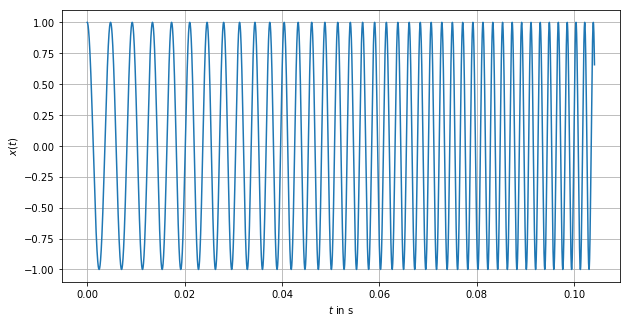

In [2]:
idx = range(5000)  # portion of the signal to show

plt.figure(figsize=(10, 5))
plt.plot(t[idx], np.real(x[idx]))
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$x(t)$')
plt.grid()

### Auralization

Lets listen to the linear sweep. Please be careful with the volume of your speakers or headphones. Start with a very low volume and increase if necessary. This holds especially for the low and high frequencies which can damage your speakers at high levels. 

In [3]:
sf.write('linear_sweep.wav', np.real(x), fs)

<audio src="linear_sweep.wav" controls>Your browser does not support the audio element.</audio>
[linear_sweep.wav](linear_sweep.wav)

### Spectrogram

The spectrogram of the linear sweep is computed and plotted

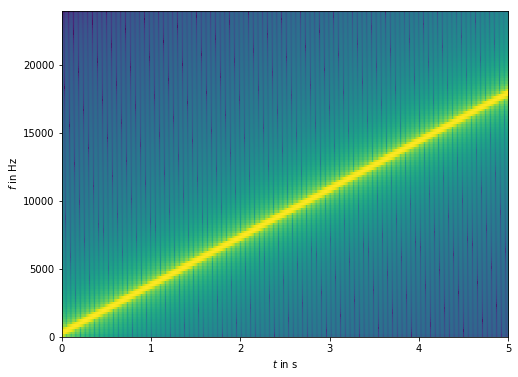

In [4]:
plt.figure(figsize=(8, 6))
plt.specgram(x, Fs=fs, sides='onesided');
plt.xlabel('$t$ in s')
plt.ylabel('$f$ in Hz');

### Spectrum of a Linear Sweep (Analytic Solution)

The analytic solution of the Fourier transform of the linear sweep signal is used to compute and plot its overall magnitude spectrum $|X(j \omega)|$

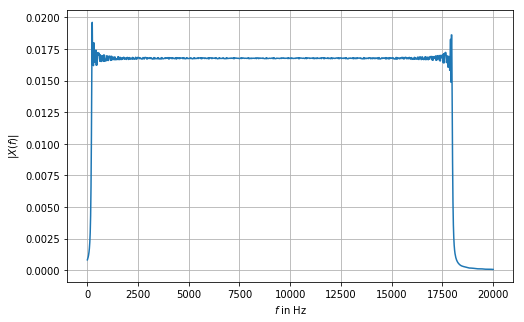

In [5]:
from scipy.special import fresnel

f = np.linspace(10, 20000, 1000)
om = 2*np.pi*f
om_s = 2*np.pi*200  # lower angluar frequency of sweep
om_e = 2*np.pi*18000  # upper angular frequency of sweep
T = 5  # duration of sweep
k = (om_e - om_s)/(2*T)


a = (om-om_s)/np.sqrt(2*np.pi*k)
b = (2*k*T-(om-om_s))/np.sqrt(2*np.pi*k)
Sa, Ca = fresnel(a)
Sb, Cb = fresnel(b)

X = np.sqrt(np.pi/(2*k)) * np.sqrt((Ca + Cb)**2 + (Sa + Sb)**2)

plt.figure(figsize=(8, 5))
plt.plot(f, X)
plt.xlabel('$f$ in Hz')
plt.ylabel(r'$|X(f)|$')
plt.grid()

### Crest Factor

The [Crest factor](https://en.wikipedia.org/wiki/Crest_factor) of the sweep is computed

In [6]:
xrms = np.sqrt( 1/T * np.sum(np.real(x)**2) * 1/fs)
C = np.max(np.real(x)) / xrms
print('Crest factor C = {:<1.5f}'.format(C))

Crest factor C = 1.41421


## Exponential Sweep

An [exponential sweep](https://en.wikipedia.org/wiki/Chirp#Exponential) is an exponential signal with an exponential increase in its instantaneous frequency. It is defined as

\begin{equation}
x(t) = e^{j \frac{\omega_l}{\ln(k)} (k^t - 1)}
\end{equation}

with

\begin{equation}
k = \left( \frac{\omega_\text{u}}{\omega_\text{l}} \right)^\frac{1}{T}
\end{equation}

where $\omega_\text{l}$ and $\omega_\text{u}$ denote its lower and upper frequency limit, and $T$ its total duration. The exponential sweep is generated in the following by sampling the continuous time.

In [7]:
om_l = 2*np.pi*100  # lower angluar frequency of sweep
om_u = 2*np.pi*18000  # upper angular frequency of sweep
T = 5  # duration of sweep
k = (om_e / om_s)**(1/T)

t = np.linspace(0, T, fs*T)
x = np.exp(1j*om_s * (k**(t) - 1) / np.log(k))

A short section of the linear sweep signal is plotted for illustration

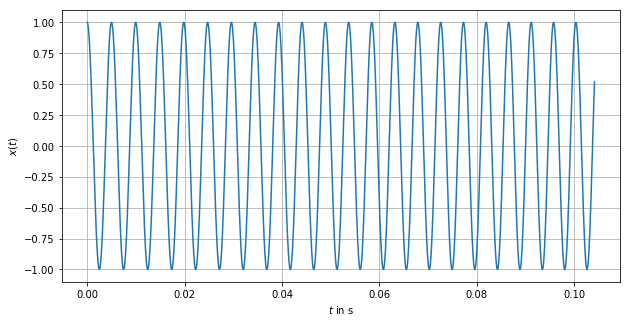

In [8]:
idx = range(5000)  # portion of the signal to show

plt.figure(figsize=(10, 5))
plt.plot(t[idx], np.real(x[idx]))
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$x(t)$')
plt.grid()

### Spectrogram

The spectrogram of the logarithmic sweep is computed and plotted

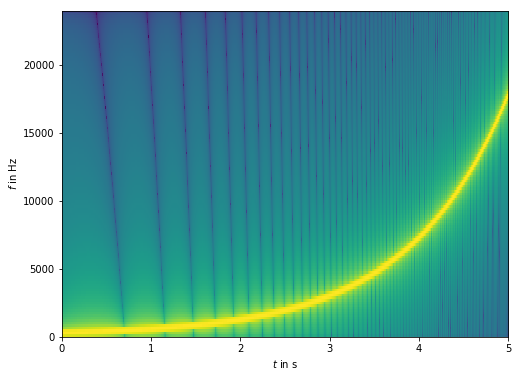

In [9]:
plt.figure(figsize=(8, 6))
plt.specgram(x, Fs=fs, sides='onesided');
plt.xlabel('$t$ in s')
plt.ylabel('$f$ in Hz');

### Spectrum

The discrete Fourier transform of the logarithmic sweep is computed and its magnitude spectrum is plotted.

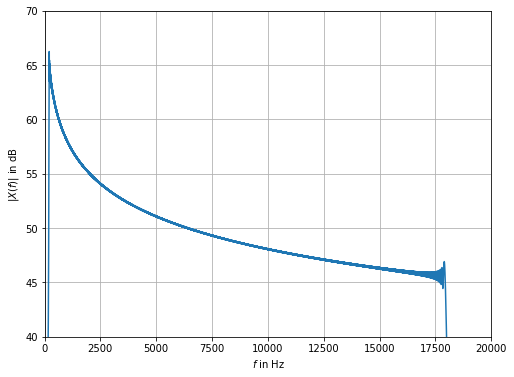

In [10]:
X = np.fft.rfft(np.real(x))
f = np.linspace(0, fs/2, len(X))

plt.figure(figsize=(8, 6))
plt.plot(f, 20*np.log10(np.abs(X)))
plt.xlabel(r'$f$ in Hz')
plt.ylabel(r'$|X(f)|$ in dB')
plt.axis([20, 20000, 40, 70])
plt.grid()

### Auralization

Lets listen to the exponential sweep. Please be careful with the volume of your speakers or headphones. Start with a very low volume and increase if necessary. This holds especially for the low and high frequencies which can damage your speakers at high levels.

In [11]:
sf.write('exponential_sweep.wav', np.real(x), fs)

<audio src="exponential_sweep.wav" controls>Your browser does not support the audio element.</audio>
[exponential_sweep.wav](exponential_sweep.wav)

**Copyright**

This notebook is provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text/images/data are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Selected Topics in Audio Signal Processing - Supplementary Material, 2017*.